# This is a Kaggle competition to predict the probability of 0 or 1 of Tabular Playground series data
## I will be comparing which model to use: XGB, Random Forest or Neural Networks


Lets first load required libraries:

In [76]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import initializers
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Lets download the dataset

In [125]:
df1 = pd.read_csv('C:/Users/taihs/OneDrive/Documents/tps competition/train.csv')

### Find the number of records

In [126]:
df1.shape

(300000, 32)

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

### Lets look at the columns

### Attributes: (all numeric-valued)
   1. Field goal percentage for home team
   2. Free throw percentage for home team
   3. 3pt Field goal percentage for home team
   4. Assists for home team
   5. Rebounds for home team
   6. Field goal percentage for away team
   7. Assists for away team
   8. Rebounds for away team
   9. Win or Loss (1 or 0)

In [128]:
df1.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
icat0=le.fit_transform(df1['cat0'])
icat1=le.fit_transform(df1['cat1'])
icat2=le.fit_transform(df1['cat2'])
icat3=le.fit_transform(df1['cat3'])
icat4=le.fit_transform(df1['cat4'])
icat5=le.fit_transform(df1['cat5'])
icat6=le.fit_transform(df1['cat6'])
icat7=le.fit_transform(df1['cat7'])
icat8=le.fit_transform(df1['cat8'])
icat9=le.fit_transform(df1['cat9'])
icat10=le.fit_transform(df1['cat10'])
icat11=le.fit_transform(df1['cat11'])
icat12=le.fit_transform(df1['cat12'])
icat13=le.fit_transform(df1['cat13'])
icat14=le.fit_transform(df1['cat14'])
icat15=le.fit_transform(df1['cat15'])
icat16=le.fit_transform(df1['cat16'])
icat17=le.fit_transform(df1['cat17'])
icat18=le.fit_transform(df1['cat18'])

In [130]:
df2 = pd.DataFrame ({'icat0':icat0,'icat1':icat1,'icat2':icat2,'icat3':icat3,'icat4':icat4,'icat5':icat5,\
                     'icat6':icat6,'icat7':icat7,'icat8':icat8,'icat9':icat9,'icat10':icat10,'icat11':icat11,\
                     'icat12':icat12,'icat13':icat13,'icat14':icat14,'icat15':icat15,'icat16':icat16,'icat17':icat17,\
                     'icat18':icat18})
df2

,icat0,icat1,icat2,icat3,icat4,icat5,icat6,icat7,icat8,icat9,icat10,icat11,icat12,icat13,icat14,icat15,icat16,icat17,icat18
0,0,8,0,1,1,33,0,44,54,0,258,0,0,0,0,1,3,3,1
1,0,8,0,0,4,33,8,48,3,5,162,0,1,0,1,3,1,3,1
2,0,10,0,0,4,33,0,30,38,9,69,0,1,0,0,1,3,3,1
3,0,10,0,2,4,33,0,50,3,5,241,0,0,0,0,1,3,3,1
4,0,8,6,1,4,33,2,32,54,0,75,0,0,0,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,13,5,0,4,45,0,19,48,0,159,0,0,0,1,3,1,3,1
299996,0,10,0,0,6,33,0,36,4,4,163,0,1,0,1,1,3,3,1
299997,0,6,12,0,7,33,2,37,43,0,156,1,0,0,1,3,1,3,3
299998,1,7,0,3,1,33,0,1,23,0,25,0,0,0,0,1,0,3,0


In [131]:
X = pd.concat([df1[['cont0','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10']],df2],axis=1)
X

,cont0,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,icat9,icat10,icat11,icat12,icat13,icat14,icat15,icat16,icat17,icat18
0,0.629858,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,...,0,258,0,0,0,0,1,3,3,1
1,0.370727,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,...,5,162,0,1,0,1,3,1,3,1
2,0.502272,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,...,9,69,0,1,0,0,1,3,3,1
3,0.934242,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,...,5,241,0,0,0,0,1,3,3,1
4,0.254427,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,...,0,75,0,0,0,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.681700,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,...,0,159,0,0,0,1,3,1,3,1
299996,0.489226,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,...,4,163,0,1,0,1,1,3,3,1
299997,0.487882,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,...,0,156,1,0,0,1,3,1,3,3
299998,0.331900,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,...,0,25,0,0,0,0,1,0,3,0


### Find the features and split the data into train and test

In [132]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.60501457,  1.13012057,  1.48320358,  0.77841806,  0.49499738,
         0.49190174,  1.42598731,  1.82732733,  2.54740193,  0.77527564,
        -0.5849203 , -0.03985428, -0.63495693,  0.32442796, -2.50936389,
         0.26095686, -0.59667435,  1.47628735,  1.08344194, -0.58202622,
         1.59106764, -0.39825287, -0.40826972, -0.15779161, -0.93437503,
        -0.56025241,  0.65968443,  0.4308457 , -0.38312652],
       [-0.6481137 , -0.60621963,  0.30988215, -0.50935767, -0.59889466,
         0.52909034, -0.45719667, -0.49551903,  2.35409893, -0.07129282,
        -0.5849203 , -0.03985428, -0.63495693, -0.5200993 , -0.53162154,
         0.26095686,  3.18564049,  1.76448086, -1.60044309,  1.22990528,
         0.28167178, -0.39825287,  2.44936115, -0.15779161,  1.07023408,
         1.5744491 , -1.49142537,  0.4308457 , -0.38312652],
       [-0.01197887, -0.80696417,  0.65601813,  1.2697701 ,  0.20982845,
        -0.64407648, -0.55482142, -0.42318901, -0.90892674,  0.20267551,
  

In [133]:
from sklearn.model_selection import train_test_split

y = df1['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### XGBoost

In [134]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

C:\Users\taihs\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
y_pred_class_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_xgb)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_xgb[:,1])))

accuracy is 0.846
roc-auc is 0.887


### RandomForest

In [136]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [137]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.845
roc-auc is 0.884


In [138]:
y_pred_prob_rf

array([[0.93 , 0.07 ],
       [0.33 , 0.67 ],
       [0.87 , 0.13 ],
       ...,
       [0.845, 0.155],
       [0.99 , 0.01 ],
       [0.95 , 0.05 ]])

In [139]:
df1 = pd.read_csv('C:/Users/taihs/OneDrive/Documents/tps competition/test.csv')
df1.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
icat0=le.fit_transform(df1['cat0'])
icat1=le.fit_transform(df1['cat1'])
icat2=le.fit_transform(df1['cat2'])
icat3=le.fit_transform(df1['cat3'])
icat4=le.fit_transform(df1['cat4'])
icat5=le.fit_transform(df1['cat5'])
icat6=le.fit_transform(df1['cat6'])
icat7=le.fit_transform(df1['cat7'])
icat8=le.fit_transform(df1['cat8'])
icat9=le.fit_transform(df1['cat9'])
icat10=le.fit_transform(df1['cat10'])
icat11=le.fit_transform(df1['cat11'])
icat12=le.fit_transform(df1['cat12'])
icat13=le.fit_transform(df1['cat13'])
icat14=le.fit_transform(df1['cat14'])
icat15=le.fit_transform(df1['cat15'])
icat16=le.fit_transform(df1['cat16'])
icat17=le.fit_transform(df1['cat17'])
icat18=le.fit_transform(df1['cat18'])

In [141]:
df2 = pd.DataFrame ({'icat0':icat0,'icat1':icat1,'icat2':icat2,'icat3':icat3,'icat4':icat4,'icat5':icat5,\
                     'icat6':icat6,'icat7':icat7,'icat8':icat8,'icat9':icat9,'icat10':icat10,'icat11':icat11,\
                     'icat12':icat12,'icat13':icat13,'icat14':icat14,'icat15':icat15,'icat16':icat16,'icat17':icat17,\
                     'icat18':icat18})
df2

,icat0,icat1,icat2,icat3,icat4,icat5,icat6,icat7,icat8,icat9,icat10,icat11,icat12,icat13,icat14,icat15,icat16,icat17,icat18
0,0,5,0,0,5,33,0,8,23,0,249,0,0,0,0,1,3,3,1
1,0,7,2,0,4,2,7,31,51,0,269,0,0,0,1,3,1,3,1
2,0,13,2,0,5,2,0,8,28,0,121,0,0,0,1,1,3,3,1
3,1,11,2,0,5,33,0,30,23,0,162,0,0,0,0,1,3,1,1
4,0,5,0,1,5,33,0,8,46,0,173,0,0,0,0,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,13,0,3,5,33,0,6,23,0,75,0,0,0,1,3,1,2,1
199996,1,8,0,1,4,33,0,19,55,4,180,0,0,0,1,1,3,3,1
199997,0,11,3,0,7,33,0,14,47,0,171,0,0,0,1,3,1,3,1
199998,0,10,0,2,5,33,0,43,38,0,162,0,0,0,0,1,3,3,1


In [142]:
X = pd.concat([df1[['cont0','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10']],df2],axis=1)
X

,cont0,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,icat9,icat10,icat11,icat12,icat13,icat14,icat15,icat16,icat17,icat18
0,0.708120,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489,...,0,249,0,0,0,0,1,3,3,1
1,0.611637,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580,...,0,269,0,0,0,1,3,1,3,1
2,0.456289,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592,...,0,121,0,0,0,1,1,3,3,1
3,0.338692,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723,...,0,162,0,0,0,0,1,3,1,1
4,0.631671,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781,...,0,173,0,0,0,0,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.451496,0.351946,0.327670,0.205547,0.679195,0.485967,0.319130,0.520681,0.519545,0.427119,...,0,75,0,0,0,1,3,1,2,1
199996,0.862988,0.628843,0.677765,0.624935,0.555306,0.242424,0.700829,0.531728,0.528427,0.922645,...,4,180,0,0,0,1,1,3,3,1
199997,0.463067,0.803348,0.324762,0.665624,0.488447,0.853213,0.578641,0.811941,0.537106,0.531758,...,0,171,0,0,0,1,3,1,3,1
199998,0.519671,0.820635,0.561449,0.797434,0.555089,0.746532,0.369986,0.438712,0.715524,0.381978,...,0,162,0,0,0,0,1,3,3,1


In [143]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.97741412,  0.28843199,  1.14267841, -1.21803283, -0.60053348,
         0.30252531,  0.75080726,  0.61488305, -0.56321106,  2.15036926,
        -0.58487154, -1.01120305, -0.63623041, -0.51805892,  0.129466  ,
         0.26538736, -0.59773745, -1.11838839, -0.55275334, -0.58627124,
         1.47795544, -0.39855056, -0.41099968, -0.15986519, -0.93597511,
        -0.5627497 ,  0.6599291 ,  0.42860004, -0.38534137],
       [ 0.51225066,  1.9206372 ,  0.19047001,  0.4198866 ,  1.21820512,
        -1.12772714,  0.74551361, -0.78475036,  0.49081065, -0.59038497,
        -0.58487154, -0.36206283, -0.15275887, -0.51805892, -0.53313698,
        -2.17765193,  2.71391909,  0.5377579 ,  0.92031982, -0.58627124,
         1.75172996, -0.39855056, -0.41099968, -0.15986519,  1.06840447,
         1.56988773, -1.49372835,  0.42860004, -0.38534137],
       [-0.23671531, -0.42630047, -0.60187195, -1.15625432, -0.95514916,
         1.22755467, -0.81992081, -0.82223402, -1.11551595, -0.47753823,
  

In [144]:
#y_pred_class_rf = rf_model.predict(X_test)
#y_pred_prob_rf = rf_model.predict_proba(X_test)

y_pred_class_xgb = xgb.predict(X)
y_pred_prob_xgb = xgb.predict_proba(X)

In [148]:
rf_model.feature_importances_
xgb.feature_importances_

array([0.00328044, 0.00677099, 0.00414476, 0.00469036, 0.00994086,
       0.0056187 , 0.00335744, 0.00450182, 0.0032738 , 0.00357411,
       0.06638327, 0.01326421, 0.01182697, 0.00342129, 0.0174576 ,
       0.00457167, 0.00685967, 0.00482599, 0.00437564, 0.00501656,
       0.00458398, 0.03178615, 0.00824781, 0.03230882, 0.03149007,
       0.06722327, 0.55155146, 0.01565459, 0.06999774], dtype=float32)

In [121]:
#y_pred_prob_rf[:,1]
y_pred_prob_xgb[:,1]

array([0.10615856, 0.5230667 , 0.01071627, ..., 0.44984958, 0.08184002,
       0.50207084], dtype=float32)

In [145]:
#final = pd.DataFrame({'target':y_pred_prob_rf[:,1]})
final = pd.DataFrame({'target':y_pred_prob_xgb[:,1]})
final.tail()

,target
199995,0.934737
199996,0.041234
199997,0.506456
199998,0.089119
199999,0.505440


In [146]:
final1 = pd.concat([df1['id'],final],axis=1)
final1.tail()

,id,target
199995,499983,0.934737
199996,499984,0.041234
199997,499987,0.506456
199998,499994,0.089119
199999,499998,0.505440


In [147]:
final1.to_csv('sample_submission.csv',index=False)

### Train a Neural Network model with one hidden layer with sigmoid activation

In [26]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (29,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                360       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
7500/7500 [==============================] - 8s 1ms/step - loss: 0.5380 - accuracy: 0.7380 - val_loss: 0.5037 - val_accuracy: 0.7449
Epoch 2/50
7500/7500 [==============================] - 4s 532us/step - loss: 0.4838 - accuracy: 0.7728 - val_loss: 0.4675 - val_accuracy: 0.7849
Epoch 3/50
7500/7500 [==============================] - 4s 512us/step - loss: 0.4515 - accuracy: 0.8032 - val_loss: 0.4307 - val_accuracy: 0.8188
Epoch 4/50
7500/7500 [==============================] - 4s 516us/step - loss: 0.4368 - accuracy: 0.8118 - val_loss: 0.4238 - val_accuracy: 0.8149
Epoch 5/50
7500/7500 [==============================] - 4s 511us/step - loss: 0.4312 - accuracy: 0.8139 - val_loss: 0.4169 - val_accuracy: 0.8200
Epoch 6/50
7500/7500 [==============================] - 4s 513us/step - loss: 0.4273 - accuracy: 0.8159 - val_loss: 0.4183 - val_accuracy: 0.8245
Epoch 7/50
7500/7500 [==============================] - 4s 513us/step - loss: 0.4259 - accuracy: 0.8167 - val_loss: 0.4393 - v

In [28]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.830
roc-auc is 0.851


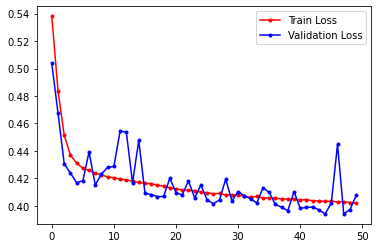

In [30]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Add two hidden layers to the Neural Networks

In [31]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (29,),activation = 'sigmoid'))
model_1.add(Dense(12,activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                360       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
7500/7500 [==============================] - 5s 647us/step - loss: 0.5857 - accuracy: 0.7224 - val_loss: 0.5747 - val_accuracy: 0.7362
Epoch 2/50
7500/7500 [==============================] - 4s 544us/step - loss: 0.5746 - accuracy: 0.7348 - val_loss: 0.5713 - val_accuracy: 0.7362
Epoch 3/50
7500/7500 [==============================] - 4s 558us/step - loss: 0.5691 - accuracy: 0.7348 - val_loss: 0.5628 - val_accuracy: 0.7362
Epoch 4/50
7500/7500 [==============================] - 4s 566us/step - loss: 0.5564 - accuracy: 0.7348 - val_loss: 0.5486 - val_accuracy: 0.7362
Epoch 5/50
7500/7500 [==============================] - 4s 561us/step - loss: 0.5326 - accuracy: 0.7348 - val_loss: 0.5190 - val_accuracy: 0.7362
Epoch 6/50
7500/7500 [==============================] - 4s 584us/step - loss: 0.4928 - accuracy: 0.7529 - val_loss: 0.4795 - val_accuracy: 0.7778
Epoch 7/50
7500/7500 [==============================] - 9s 1ms/step - loss: 0.4572 - accuracy: 0.8031 - val_loss: 0.4330 - v

In [33]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.829
roc-auc is 0.857


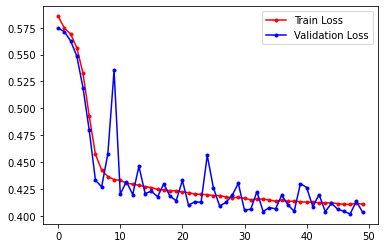

In [34]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Change to two hidden layers with activation relu

In [36]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (29,),activation = 'relu'))
model_1.add(Dense(12,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                360       
_________________________________________________________________
dense_13 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 13        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
7500/7500 [==============================] - 8s 1ms/step - loss: 0.5405 - accuracy: 0.7368 - val_loss: 0.4932 - val_accuracy: 0.7430
Epoch 2/50
7500/7500 [==============================] - 4s 539us/step - loss: 0.4799 - accuracy: 0.7762 - val_loss: 0.4357 - val_accuracy: 0.8103
Epoch 3/50
7500/7500 [==============================] - 4s 542us/step - loss: 0.4448 - accuracy: 0.8043 - val_loss: 0.4336 - val_accuracy: 0.8063
Epoch 4/50
7500/7500 [==============================] - 4s 541us/step - loss: 0.4291 - accuracy: 0.8130 - val_loss: 0.4193 - val_accuracy: 0.8226
Epoch 5/50
7500/7500 [==============================] - 4s 527us/step - loss: 0.4219 - accuracy: 0.8178 - val_loss: 0.4099 - val_accuracy: 0.8210
Epoch 6/50
7500/7500 [==============================] - 4s 537us/step - loss: 0.4172 - accuracy: 0.8202 - val_loss: 0.4090 - val_accuracy: 0.8271
Epoch 7/50
7500/7500 [==============================] - 4s 540us/step - loss: 0.4142 - accuracy: 0.8220 - val_loss: 0.4060 - v

In [38]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.833
roc-auc is 0.863


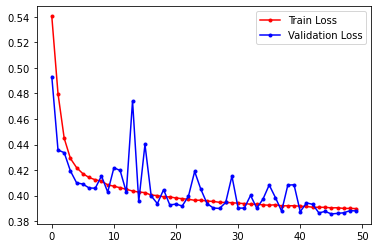

In [39]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Change to epochs 1000

In [42]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
7500/7500 [==============================] - 4s 549us/step - loss: 0.3810 - accuracy: 0.8360 - val_loss: 0.3859 - val_accuracy: 0.8334
Epoch 2/500
7500/7500 [==============================] - 4s 551us/step - loss: 0.3807 - accuracy: 0.8361 - val_loss: 0.3809 - val_accuracy: 0.8354
Epoch 3/500
7500/7500 [==============================] - 6s 742us/step - loss: 0.3807 - accuracy: 0.8364 - val_loss: 0.3799 - val_accuracy: 0.8360
Epoch 4/500
7500/7500 [==============================] - 4s 559us/step - loss: 0.3809 - accuracy: 0.8364 - val_loss: 0.3798 - val_accuracy: 0.8357
Epoch 5/500
7500/7500 [==============================] - 4s 546us/step - loss: 0.3809 - accuracy: 0.8363 - val_loss: 0.3863 - val_accuracy: 0.8321
Epoch 6/500
7500/7500 [==============================] - 4s 544us/step - loss: 0.3809 - accuracy: 0.8359 - val_loss: 0.3809 - val_accuracy: 0.8365
Epoch 7/500
7500/7500 [==============================] - 4s 542us/step - loss: 0.3805 - accuracy: 0.8366 - val_loss: 0

7500/7500 [==============================] - 4s 539us/step - loss: 0.3797 - accuracy: 0.8370 - val_loss: 0.3855 - val_accuracy: 0.8332
Epoch 55/500
7500/7500 [==============================] - 4s 545us/step - loss: 0.3799 - accuracy: 0.8369 - val_loss: 0.3793 - val_accuracy: 0.8373
Epoch 56/500
7500/7500 [==============================] - 4s 542us/step - loss: 0.3797 - accuracy: 0.8362 - val_loss: 0.3777 - val_accuracy: 0.8377
Epoch 57/500
7500/7500 [==============================] - 4s 541us/step - loss: 0.3798 - accuracy: 0.8363 - val_loss: 0.3847 - val_accuracy: 0.8363
Epoch 58/500
7500/7500 [==============================] - 4s 539us/step - loss: 0.3798 - accuracy: 0.8362 - val_loss: 0.3786 - val_accuracy: 0.8371
Epoch 59/500
7500/7500 [==============================] - 4s 549us/step - loss: 0.3798 - accuracy: 0.8367 - val_loss: 0.3776 - val_accuracy: 0.8377
Epoch 60/500
7500/7500 [==============================] - 4s 565us/step - loss: 0.3795 - accuracy: 0.8367 - val_loss: 0.3890 

7500/7500 [==============================] - 4s 541us/step - loss: 0.3791 - accuracy: 0.8368 - val_loss: 0.3872 - val_accuracy: 0.8328
Epoch 110/500
7500/7500 [==============================] - 4s 540us/step - loss: 0.3793 - accuracy: 0.8372 - val_loss: 0.3788 - val_accuracy: 0.8366
Epoch 111/500
7500/7500 [==============================] - 4s 544us/step - loss: 0.3789 - accuracy: 0.8371 - val_loss: 0.3773 - val_accuracy: 0.8376
Epoch 112/500
7500/7500 [==============================] - 4s 538us/step - loss: 0.3791 - accuracy: 0.8368 - val_loss: 0.3807 - val_accuracy: 0.8375
Epoch 113/500
7500/7500 [==============================] - 4s 538us/step - loss: 0.3788 - accuracy: 0.8370 - val_loss: 0.3810 - val_accuracy: 0.8354
Epoch 114/500
7500/7500 [==============================] - 4s 541us/step - loss: 0.3789 - accuracy: 0.8370 - val_loss: 0.3831 - val_accuracy: 0.8353
Epoch 115/500
7500/7500 [==============================] - 4s 546us/step - loss: 0.3789 - accuracy: 0.8374 - val_loss: 0

7500/7500 [==============================] - 5s 704us/step - loss: 0.3783 - accuracy: 0.8373 - val_loss: 0.3794 - val_accuracy: 0.8366
Epoch 165/500
7500/7500 [==============================] - 4s 579us/step - loss: 0.3783 - accuracy: 0.8368 - val_loss: 0.3808 - val_accuracy: 0.8357
Epoch 166/500
7500/7500 [==============================] - 4s 553us/step - loss: 0.3786 - accuracy: 0.8371 - val_loss: 0.3774 - val_accuracy: 0.8375
Epoch 167/500
7500/7500 [==============================] - 4s 536us/step - loss: 0.3785 - accuracy: 0.8371 - val_loss: 0.3764 - val_accuracy: 0.8378
Epoch 168/500
7500/7500 [==============================] - 4s 588us/step - loss: 0.3783 - accuracy: 0.8374 - val_loss: 0.3770 - val_accuracy: 0.8375
Epoch 169/500
7500/7500 [==============================] - 4s 587us/step - loss: 0.3785 - accuracy: 0.8369 - val_loss: 0.3766 - val_accuracy: 0.8381
Epoch 170/500
7500/7500 [==============================] - 4s 556us/step - loss: 0.3785 - accuracy: 0.8374 - val_loss: 0

7500/7500 [==============================] - 4s 540us/step - loss: 0.3778 - accuracy: 0.8373 - val_loss: 0.3773 - val_accuracy: 0.8381
Epoch 220/500
7500/7500 [==============================] - 4s 534us/step - loss: 0.3779 - accuracy: 0.8378 - val_loss: 0.3771 - val_accuracy: 0.8380
Epoch 221/500
7500/7500 [==============================] - 4s 521us/step - loss: 0.3778 - accuracy: 0.8374 - val_loss: 0.3818 - val_accuracy: 0.8357
Epoch 222/500
7500/7500 [==============================] - 4s 513us/step - loss: 0.3780 - accuracy: 0.8372 - val_loss: 0.3778 - val_accuracy: 0.8370
Epoch 223/500
7500/7500 [==============================] - 4s 516us/step - loss: 0.3777 - accuracy: 0.8371 - val_loss: 0.3855 - val_accuracy: 0.8338
Epoch 224/500
7500/7500 [==============================] - 4s 550us/step - loss: 0.3779 - accuracy: 0.8375 - val_loss: 0.3777 - val_accuracy: 0.8382
Epoch 225/500
7500/7500 [==============================] - 4s 522us/step - loss: 0.3778 - accuracy: 0.8377 - val_loss: 0

7500/7500 [==============================] - 4s 542us/step - loss: 0.3776 - accuracy: 0.8373 - val_loss: 0.3798 - val_accuracy: 0.8370
Epoch 275/500
7500/7500 [==============================] - 4s 540us/step - loss: 0.3776 - accuracy: 0.8379 - val_loss: 0.3784 - val_accuracy: 0.8374
Epoch 276/500
7500/7500 [==============================] - 4s 556us/step - loss: 0.3776 - accuracy: 0.8376 - val_loss: 0.3798 - val_accuracy: 0.8367
Epoch 277/500
7500/7500 [==============================] - 4s 551us/step - loss: 0.3776 - accuracy: 0.8375 - val_loss: 0.3781 - val_accuracy: 0.8378
Epoch 278/500
7500/7500 [==============================] - 4s 540us/step - loss: 0.3776 - accuracy: 0.8377 - val_loss: 0.3800 - val_accuracy: 0.8370
Epoch 279/500
7500/7500 [==============================] - 4s 566us/step - loss: 0.3776 - accuracy: 0.8374 - val_loss: 0.3785 - val_accuracy: 0.8368
Epoch 280/500
7500/7500 [==============================] - 4s 552us/step - loss: 0.3776 - accuracy: 0.8374 - val_loss: 0

7500/7500 [==============================] - 4s 542us/step - loss: 0.3770 - accuracy: 0.8376 - val_loss: 0.3784 - val_accuracy: 0.8377
Epoch 330/500
7500/7500 [==============================] - 4s 539us/step - loss: 0.3772 - accuracy: 0.8375 - val_loss: 0.3787 - val_accuracy: 0.8375
Epoch 331/500
7500/7500 [==============================] - 4s 559us/step - loss: 0.3772 - accuracy: 0.8374 - val_loss: 0.3757 - val_accuracy: 0.8381
Epoch 332/500
7500/7500 [==============================] - 4s 548us/step - loss: 0.3772 - accuracy: 0.8379 - val_loss: 0.3774 - val_accuracy: 0.8373
Epoch 333/500
7500/7500 [==============================] - 4s 544us/step - loss: 0.3770 - accuracy: 0.8378 - val_loss: 0.3777 - val_accuracy: 0.8367
Epoch 334/500
7500/7500 [==============================] - 47s 6ms/step - loss: 0.3773 - accuracy: 0.8377 - val_loss: 0.3804 - val_accuracy: 0.8360
Epoch 335/500
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3772 - accuracy: 0.8378 - val_loss: 0.37

7500/7500 [==============================] - 4s 591us/step - loss: 0.3771 - accuracy: 0.8375 - val_loss: 0.3766 - val_accuracy: 0.8385
Epoch 385/500
7500/7500 [==============================] - 4s 591us/step - loss: 0.3768 - accuracy: 0.8379 - val_loss: 0.3774 - val_accuracy: 0.8372
Epoch 386/500
7500/7500 [==============================] - 5s 684us/step - loss: 0.3768 - accuracy: 0.8376 - val_loss: 0.3804 - val_accuracy: 0.8358
Epoch 387/500
7500/7500 [==============================] - 5s 656us/step - loss: 0.3767 - accuracy: 0.8378 - val_loss: 0.3763 - val_accuracy: 0.8382
Epoch 388/500
7500/7500 [==============================] - 5s 679us/step - loss: 0.3768 - accuracy: 0.8378 - val_loss: 0.3792 - val_accuracy: 0.8361
Epoch 389/500
7500/7500 [==============================] - 5s 690us/step - loss: 0.3769 - accuracy: 0.8378 - val_loss: 0.3788 - val_accuracy: 0.8371
Epoch 390/500
7500/7500 [==============================] - 5s 696us/step - loss: 0.3768 - accuracy: 0.8375 - val_loss: 0

7500/7500 [==============================] - 4s 513us/step - loss: 0.3767 - accuracy: 0.8379 - val_loss: 0.3795 - val_accuracy: 0.8360
Epoch 440/500
7500/7500 [==============================] - 4s 525us/step - loss: 0.3768 - accuracy: 0.8380 - val_loss: 0.3775 - val_accuracy: 0.8370
Epoch 441/500
7500/7500 [==============================] - 4s 511us/step - loss: 0.3767 - accuracy: 0.8377 - val_loss: 0.3786 - val_accuracy: 0.8364
Epoch 442/500
7500/7500 [==============================] - 4s 512us/step - loss: 0.3765 - accuracy: 0.8377 - val_loss: 0.3780 - val_accuracy: 0.8375
Epoch 443/500
7500/7500 [==============================] - 4s 510us/step - loss: 0.3765 - accuracy: 0.8375 - val_loss: 0.3775 - val_accuracy: 0.8373
Epoch 444/500
7500/7500 [==============================] - 4s 512us/step - loss: 0.3765 - accuracy: 0.8383 - val_loss: 0.3761 - val_accuracy: 0.8377
Epoch 445/500
7500/7500 [==============================] - 4s 509us/step - loss: 0.3767 - accuracy: 0.8377 - val_loss: 0

7500/7500 [==============================] - 4s 592us/step - loss: 0.3764 - accuracy: 0.8380 - val_loss: 0.3798 - val_accuracy: 0.8364
Epoch 495/500
7500/7500 [==============================] - 4s 568us/step - loss: 0.3766 - accuracy: 0.8376 - val_loss: 0.3762 - val_accuracy: 0.8379
Epoch 496/500
7500/7500 [==============================] - 4s 569us/step - loss: 0.3763 - accuracy: 0.8376 - val_loss: 0.3813 - val_accuracy: 0.8352
Epoch 497/500
7500/7500 [==============================] - 4s 531us/step - loss: 0.3762 - accuracy: 0.8383 - val_loss: 0.3843 - val_accuracy: 0.8347
Epoch 498/500
7500/7500 [==============================] - 4s 515us/step - loss: 0.3766 - accuracy: 0.8380 - val_loss: 0.3809 - val_accuracy: 0.8359
Epoch 499/500
7500/7500 [==============================] - 4s 511us/step - loss: 0.3764 - accuracy: 0.8382 - val_loss: 0.3825 - val_accuracy: 0.8346
Epoch 500/500
7500/7500 [==============================] - 4s 510us/step - loss: 0.3764 - accuracy: 0.8381 - val_loss: 0

In [43]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.837
roc-auc is 0.871


In [44]:
y_pred_class_nn_1 = model_1.predict_classes(X)
y_pred_prob_nn_1 = model_1.predict(X)

In [70]:
y_pred_prob_nn_1[:,0]

array([0.05876464, 0.55560994, 0.06158394, ..., 0.70166874, 0.11884412,
       0.34610277], dtype=float32)

In [71]:
final=pd.DataFrame({'target': y_pred_prob_nn_1[:,0]})
final.head()

,target
0,0.058765
1,0.555610
2,0.061584
3,0.090531
4,0.084319


In [72]:
final1 = pd.concat([df1['id'],final],axis=1)
final1.head()

,id,target
0,5,0.058765
1,6,0.555610
2,8,0.061584
3,9,0.090531
4,11,0.084319


In [73]:
final1.to_csv('sample_submission.csv',index=False)